#Tarea 1 Métodos Supervisados

*Elaborado por M.Sc.Humberto Perera Fonseca, humberto.perera@cgr.go.cr

## Instalaciones y funciones

In [23]:
#Importamos las bibliotecas necesarias
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = 10

In [24]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global     = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":   precision_global, 
            "Error Global":       error_global, 
            "Precisión por categoría":precision_categoria}

In [25]:
import matplotlib.ticker as mticker

def distribucion_variable_predecir(data:pd.DataFrame,variable_predict:str, ax = None):
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15,10), dpi = 200)
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index = data[variable_predict],columns = "valor") / data[variable_predict].count()
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    
    for i in range(df.shape[0]):
        ax.barh(1, df.iloc[i], left = countv, align = 'center', color = colors[11 + i], label = df.iloc[i].name)
        countv = countv + df.iloc[i]
        
    ax.set_xlim(0,1)
    ax.set_yticklabels("")
    ax.set_ylabel(variable_predict)
    ax.set_title(titulo)
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
    
    countv = 0
    for v in df.iloc[:,0]:
        ax.text(np.mean([countv, countv + v]) - 0.03, 1 , '{:.1%}'.format(v), color = 'black', fontweight = 'bold')
        countv = countv + v
    ax.legend(loc = 'upper center', bbox_to_anchor = (1.08, 1), shadow = True, ncol = 1)

In [26]:
def poder_predictivo_categorica(data: pd.DataFrame, var: str, variable_predict: str, ax=None):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize = (15, 10), dpi = 200)
    df = pd.crosstab(index = data[var], columns = data[variable_predict])
    df = df.div(df.sum(axis = 1), axis = 0)
    titulo = "Distribución de la variable %s según la variable %s" % (var, variable_predict)
    df.plot(kind = 'barh', stacked = True,   legend = True, ax = ax,
            xlim = (0, 1), title   = titulo, width = 0.8)
            
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
    ax.legend(loc = 'upper center', bbox_to_anchor = (1.08, 1), 
              shadow = True, ncol = 1)
              
    for bars in ax.containers:
        plt.setp(bars, width = .9)
    for i in range(df.shape[0]):
        countv = 0
        for v in df.iloc[i]:
            ax.text(np.mean([countv, countv+v]) - 0.03, i,
                    '{:.1%}'.format(v), color = 'black', fontweight = 'bold')
            countv = countv + v

def poder_predictivo_numerica(data:pd.DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue = variable_predict, height = 8, aspect = 1.8).map(sns.kdeplot, var, shade = True).add_legend()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pregunta 1

 Cálculo de Matriz de Confusión a mano e indicadores relacionados.

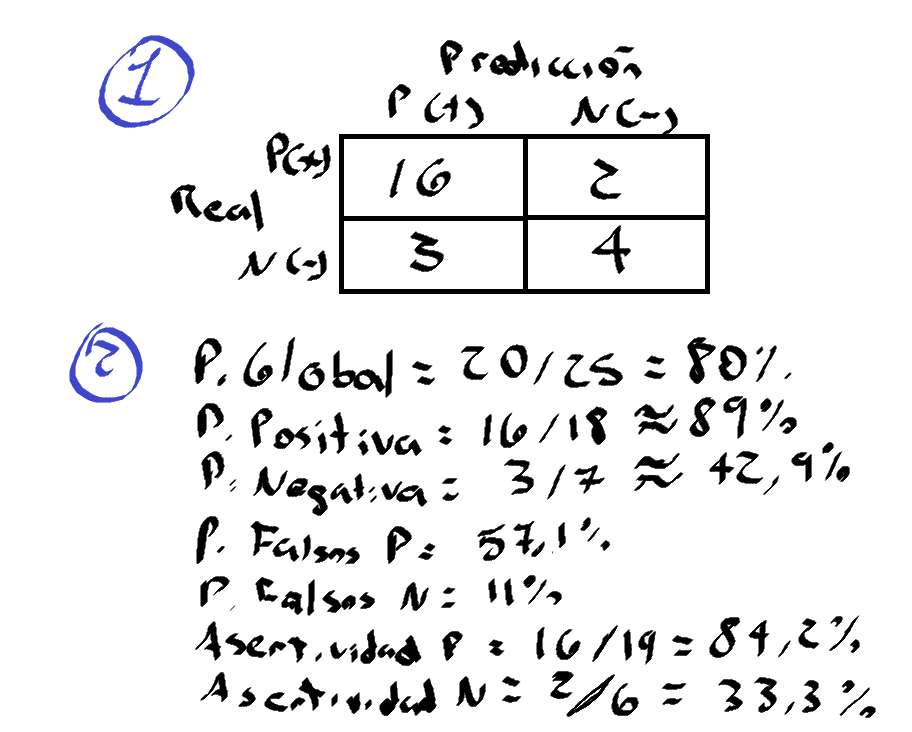

## Pregunta 2

Programe en lenguaje Python una clase que contenga un método que reciba como entrada la Matriz de Confusión (para el caso 2 × 2) que calcule y retorne en
un diccionario: la Precisión Global, el Error Global, la Precisión Positiva (PP), la Precisión Negativa (PN), la Proporción de Falsos Positivos (PFP), la Proporción de Falsos Negativos (PFN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN).

In [14]:
class metricas_confusion:
    def __init__(self, matriz_confusion):
        self.matriz_confusion = matriz_confusion

    @property
    def matriz_confusion(self):
        return self._matriz_confusion

    @matriz_confusion.setter
    def matriz_confusion(self, matriz_confusion):
        if len(matriz_confusion) != 2 or len(matriz_confusion[0]) != 2 or len(matriz_confusion[1]) != 2:
            raise ValueError("La matriz de confusión debe tener dimensiones 2x2")
        self._matriz_confusion = np.array(matriz_confusion)

    def calcular_metricas(self):
        tp, fn, fp, tn = self.matriz_confusion.ravel()
        
        # Precisión Global
        p_global = (tp + tn) / (tp + tn + fp + fn)
        
        # Error Global
        e_global = 1 - p_global
        
        # Precisión Positiva
        if tp + fn != 0:
            p_positivo = tp / (tp + fn)
        else:
            p_positivo = None
        
        # Precisión Negativa
        if tn + fp != 0:
            p_negativo = tn / (tn + fp)
        else:
            p_negativo = None
        
        # Proporción de Falsos Positivos
        if tn + fp != 0:
            tasa_falsos_positivos = fp / (tn + fp)
        else:
            tasa_falsos_positivos = None
        
        # Proporción de Falsos Negativos
        if tp + fn != 0:
            tasa_falsos_negativos = fn / (tp + fn)
        else:
            tasa_falsos_negativos = None
        
        # Asertividad Positiva
        if tp + fp != 0:
            Asertividad_positiva = tp / (tp + fp)
        else:
            Asertividad_positiva = None
        
        # Asertividad Negativa
        if tn + fn != 0:
            Asertividad_negativa = tn / (tn + fn)
        else:
            Asertividad_negativa = None
        
        dic_metricas = {
            'Precisión_Global': p_global,
            'Error_Global': e_global,
            'Precisión_positiva': p_positivo,
            'Precisión_negativa': p_negativo,
            'Falso_Positivo': tasa_falsos_positivos,
            'Falso_Negativo': tasa_falsos_negativos,
            'Asertividad_Positiva': Asertividad_positiva,
            'Asertividad_Negativa': Asertividad_negativa
        }
        
        return dic_metricas


Prueba

In [15]:
matriz= [[314, 7586], [229, 823587]]
mc= metricas_confusion(matriz)
mc.calcular_metricas()

{'Precisión_Global': 0.9906037637847535,
 'Error_Global': 0.009396236215246545,
 'Precisión_positiva': 0.039746835443037976,
 'Precisión_negativa': 0.9997220253066219,
 'Falso_Positivo': 0.00027797469337813296,
 'Falso_Negativo': 0.9602531645569621,
 'Asertividad_Positiva': 0.578268876611418,
 'Asertividad_Negativa': 0.9908731395269096}

El modelo parece ser bueno. Sin emabargo, hay que analizar el tipo de problema pues la precisión positiva es muy baja, esto puede ser un defecto en el caso que nuestro objetivo sea clasificar correctamentee beneficiarios sociales por ejemplo donde buscamos que clasificar bien a los beneficiarios potenciales, entregando mucho a los que no eran potenciales beneficiarios.

## Pregunta 3
EEn este ejercicio vamos a trabajar con los datos *turnover.csv*

In [79]:
datos = pd.read_csv('/content/drive/Shareddrives/Humberto Perera/Conocimiento/Experto en Machine Learning/C3. Metodos supervisados/Semana 1 KNN/Tarea 1/turnover.csv', delimiter=',',decimal=".")
datos.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [73]:
datos.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [74]:
datos.describe(exclude=[float, int])

,department,salary,left
count,9540,9540,9540
unique,10,3,2
top,sales,medium,no
freq,1883,6611,6756


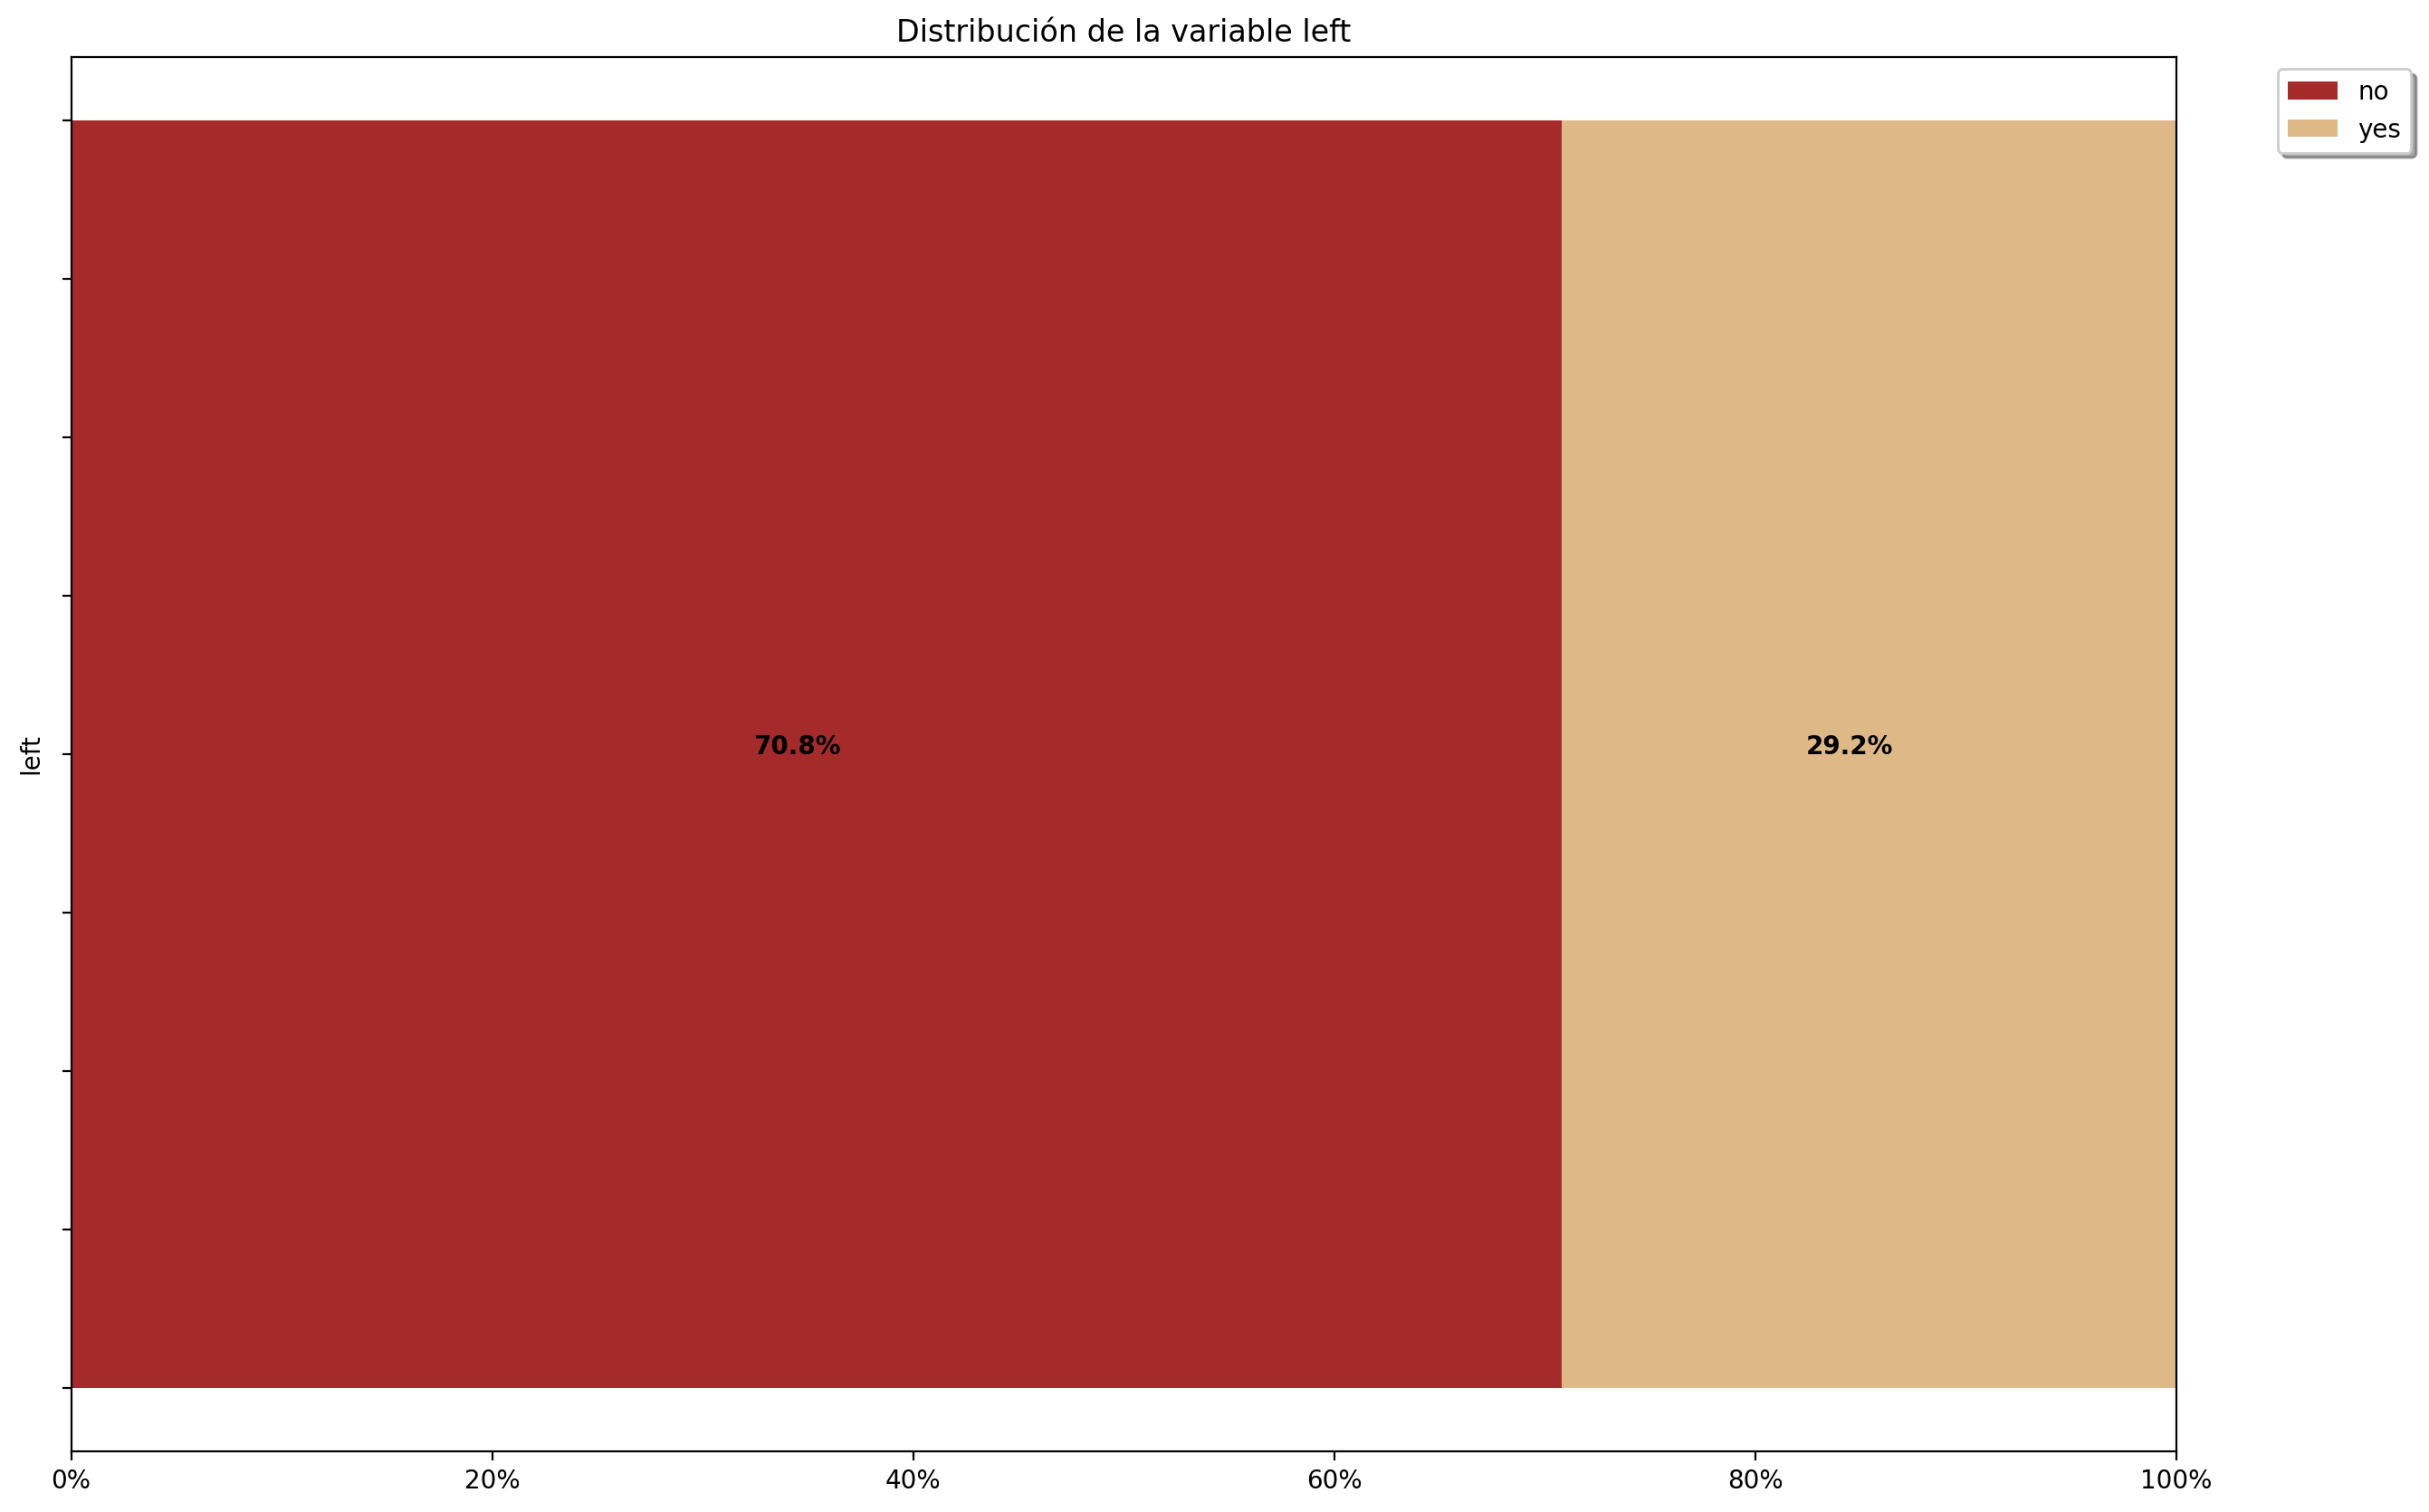

In [75]:
distribucion_variable_predecir(datos,"left")
plt.show()

### 1. ¿Es este problema equilibrado o desequilibrado? Justifique su respuesta.

Este es un problema desequilibrado pues tiene una alta concentración (70%) de no en la variable a predecir.

### 2. Use el método de K vecinos más cercanos en Python para generar un modelo predictivo para la tabla turnover.csv usando el 75 % de los datos para la tabla aprendizaje y un 25 % para la tabla testing. Intente con varios valores de K e indique cuál fue la mejor opción.

Preparación

In [80]:
#Guardamos las variables predictoras en X

X = datos.loc[:, datos.columns != 'left']
#Convertimos a Dummy algunas de las variables predictoras
X = pd.get_dummies(X)
X.head()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium
0,0,0.577569,3,5.0,0.626759,0,180.866070,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0.751900,3,6.0,0.443679,0,182.708149,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0.722548,3,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0.675158,4,8.0,0.440139,0,188.707545,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0.676203,3,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,0,1,0,1,0,0


In [81]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)
X.head()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium
0,-0.176748,-0.870524,-0.474599,-1.099499,0.770211,-0.518771,-0.915767,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,2.295227,-0.438918,-0.495902,-0.288921,-0.440106,2.430646,-1.50236
1,-0.176748,1.173161,-0.474599,-0.392964,-0.384527,-0.518771,-0.471316,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,2.295227,-0.438918,-0.495902,-0.288921,-0.440106,-0.411413,0.66562
2,-0.176748,0.829076,-0.474599,-0.392964,-0.364695,-0.518771,-0.059230,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,-0.435687,-0.438918,-0.495902,3.461155,-0.440106,-0.411413,0.66562
3,-0.176748,0.273521,1.252203,1.020106,-0.406856,-0.518771,0.976200,-0.196883,-0.215399,-0.434664,-0.209743,5.049752,-0.302957,-0.435687,-0.438918,-0.495902,-0.288921,2.272178,-0.411413,-1.50236
4,-0.176748,0.285770,-0.474599,-1.099499,0.460198,1.927633,-1.167898,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,-0.435687,-0.438918,2.016528,-0.288921,2.272178,-0.411413,-1.50236


In [82]:
y = datos["left"].ravel()

entrenamiento

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 )

Cambiando K

In [84]:
k_values = range(2, 10, 1)
indices = {}
m={}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=k).fit(X_train.values,y_train).predict(X_test.values)
  labels = ["no","yes"]
  MC = confusion_matrix(y_test, prediccion,labels=labels)
  indices[k] = indices_general(MC, labels)
  mc = metricas_confusion(MC)
  m[k]= mc.calcular_metricas()

for k in k_values:
  print("\n" +"*" * 20 + "\nPara k = %i\n" % k + "*" * 20 )
  for i in m[k]:
    print("\n%s:\n%s"%(i,str(m[k][i])))


********************
Para k = 2
********************

Precisión_Global:
0.7886792452830189

Error_Global:
0.21132075471698109

Precisión_positiva:
0.9455822118197776

Precisión_negativa:
0.39201183431952663

Falso_Positivo:
0.6079881656804734

Falso_Negativo:
0.05441778818022235

Asertividad_Positiva:
0.7972372964972866

Asertividad_Negativa:
0.7402234636871509

********************
Para k = 3
********************

Precisión_Global:
0.7949685534591195

Error_Global:
0.20503144654088046

Precisión_positiva:
0.8777062609713283

Precisión_negativa:
0.5857988165680473

Falso_Positivo:
0.41420118343195267

Falso_Negativo:
0.12229373902867174

Asertividad_Positiva:
0.8426966292134831

Asertividad_Negativa:
0.6545454545454545

********************
Para k = 4
********************

Precisión_Global:
0.8025157232704403

Error_Global:
0.1974842767295597

Precisión_positiva:
0.9403159742539496

Precisión_negativa:
0.4541420118343195

Falso_Positivo:
0.5458579881656804

Falso_Negativo:
0.059684025

El mejor modelo es K=3 con resultados balanceados en la precisión entre las clases.

### 3. Genere un Modelo Predictivo usando K vecinos más cercanos para cada uno de los siguientes núcleos *ball tree, kd tree y brute* ¿Cuál produce los mejores resultados en el sentido de que predice mejor?

In [85]:
k_values = ["ball_tree","kd_tree" ,  "brute"]
indices = {}
m={}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=3,algorithm=k).fit(X_train.values,y_train).predict(X_test.values)
  labels = ["no", "yes"]
  MC = confusion_matrix(y_test, prediccion,labels=labels)
  indices[k] = indices_general(MC, labels)
  mc = metricas_confusion(MC)
  m[k]= mc.calcular_metricas()

for k in k_values:
  print("\n" +"*" * 30 + "\nPara algorithm = %s\n" % k + "*" * 30)
  for i in m[k]:
    print("\n%s:\n%s"%(i,str(m[k][i])))


******************************
Para algorithm = ball_tree
******************************

Precisión_Global:
0.7949685534591195

Error_Global:
0.20503144654088046

Precisión_positiva:
0.8777062609713283

Precisión_negativa:
0.5857988165680473

Falso_Positivo:
0.41420118343195267

Falso_Negativo:
0.12229373902867174

Asertividad_Positiva:
0.8426966292134831

Asertividad_Negativa:
0.6545454545454545

******************************
Para algorithm = kd_tree
******************************

Precisión_Global:
0.7949685534591195

Error_Global:
0.20503144654088046

Precisión_positiva:
0.8777062609713283

Precisión_negativa:
0.5857988165680473

Falso_Positivo:
0.41420118343195267

Falso_Negativo:
0.12229373902867174

Asertividad_Positiva:
0.8426966292134831

Asertividad_Negativa:
0.6545454545454545

******************************
Para algorithm = brute
******************************

Precisión_Global:
0.7949685534591195

Error_Global:
0.20503144654088046

Precisión_positiva:
0.8777062609713283



No afecta la elección del algoritmo

### 4. Repita el item 3), pero esta vez, seleccione las 5 variables que, según su criterio, tienen mejor poder predictivo

In [98]:
#Guardamos las variables predictoras en X

X = datos
#Convertimos a Dummy algunas de las variables predictoras
X = pd.get_dummies(X)
X.head()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,...,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium,left_no,left_yes
0,0,0.577569,3,5.0,0.626759,0,180.866070,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0.751900,3,6.0,0.443679,0,182.708149,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0.722548,3,6.0,0.446823,0,184.416084,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0.675158,4,8.0,0.440139,0,188.707545,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0.676203,3,5.0,0.577607,1,179.821083,0,0,0,...,0,0,0,1,0,1,0,0,1,0


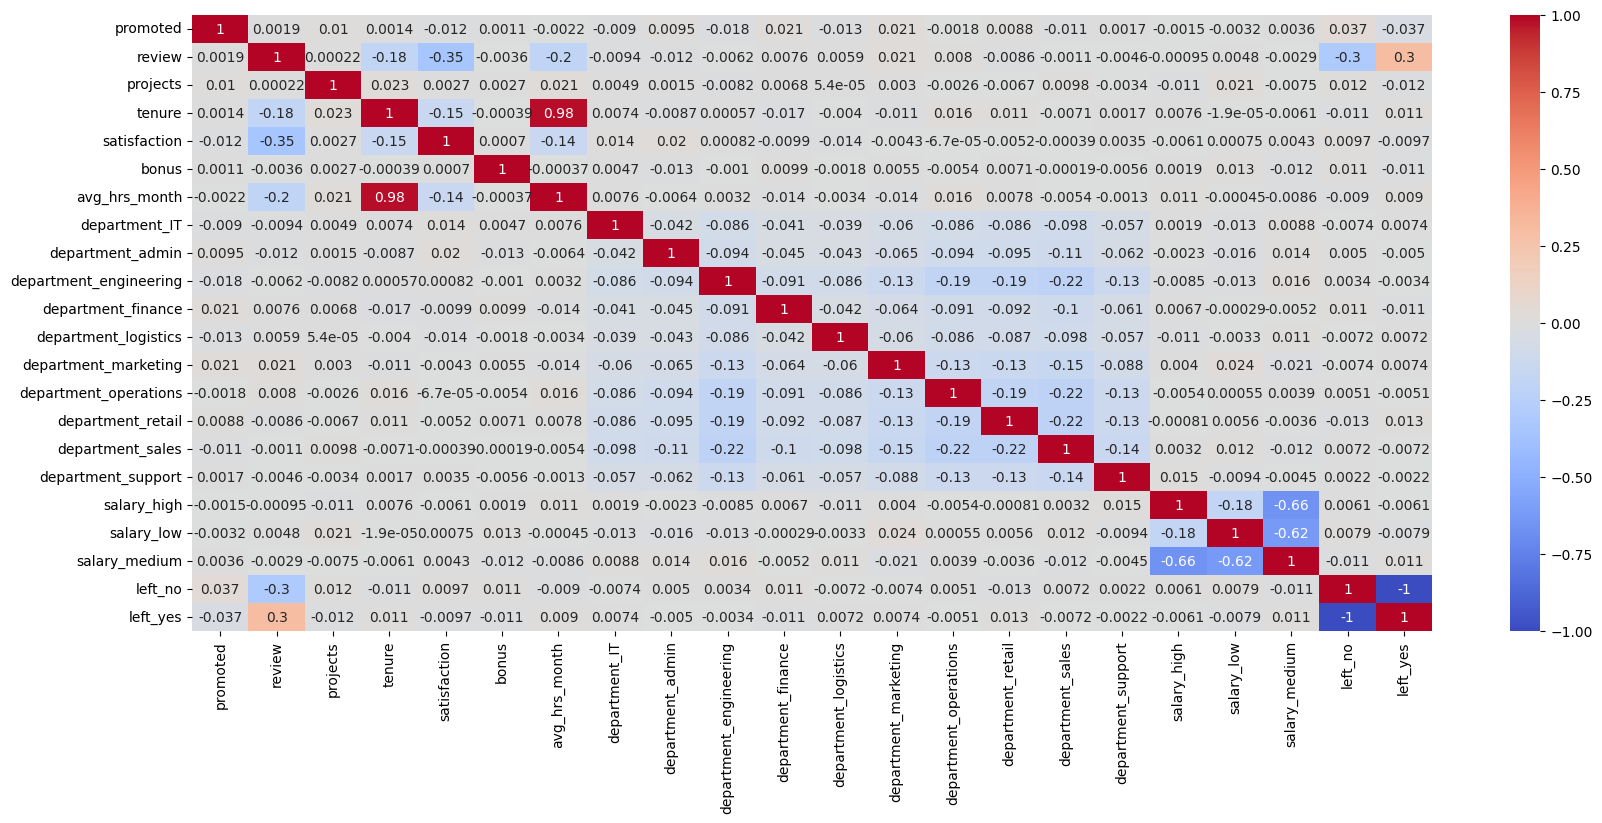

In [99]:
# calcular la matriz de correlación
corr_matrix = X.corr()

# crear el mapa de calor utilizando la función heatmap() de Seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# ajustar los límites de los ejes para que el mapa de calor esté completamente visible
plt.ylim(len(corr_matrix), 0)
plt.xlim(0, len(corr_matrix))
plt.show()

In [102]:
X = datos.loc[:, ['department', 'promoted', 'salary', 'satisfaction', 'review']]
X = X.loc[:, X.columns != 'left']
X.head()

,department,promoted,salary,satisfaction,review
0,operations,0,low,0.626759,0.577569
1,operations,0,medium,0.443679,0.751900
2,support,0,medium,0.446823,0.722548
3,logistics,0,high,0.440139,0.675158
4,sales,0,high,0.577607,0.676203


In [103]:
X = pd.get_dummies(X)
X = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)
X.head()

,promoted,satisfaction,review,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium
0,-0.176748,0.770211,-0.870524,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,2.295227,-0.438918,-0.495902,-0.288921,-0.440106,2.430646,-1.50236
1,-0.176748,-0.384527,1.173161,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,2.295227,-0.438918,-0.495902,-0.288921,-0.440106,-0.411413,0.66562
2,-0.176748,-0.364695,0.829076,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,-0.435687,-0.438918,-0.495902,3.461155,-0.440106,-0.411413,0.66562
3,-0.176748,-0.406856,0.273521,-0.196883,-0.215399,-0.434664,-0.209743,5.049752,-0.302957,-0.435687,-0.438918,-0.495902,-0.288921,2.272178,-0.411413,-1.50236
4,-0.176748,0.460198,0.285770,-0.196883,-0.215399,-0.434664,-0.209743,-0.198030,-0.302957,-0.435687,-0.438918,2.016528,-0.288921,2.272178,-0.411413,-1.50236


In [104]:
y = datos["left"].ravel()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 )

In [106]:
k_values = ["ball_tree","kd_tree" ,  "brute"]
indices = {}
m={}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=3,algorithm=k).fit(X_train.values,y_train).predict(X_test.values)
  labels = ["no", "yes"]
  MC = confusion_matrix(y_test, prediccion,labels=labels)
  indices[k] = indices_general(MC, labels)
  mc = metricas_confusion(MC)
  m[k]= mc.calcular_metricas()

for k in k_values:
  print("\n" +"*" * 30 + "\nPara algorithm = %s\n" % k + "*" * 30)
  for i in m[k]:
    print("\n%s:\n%s"%(i,str(m[k][i])))


******************************
Para algorithm = ball_tree
******************************

Precisión_Global:
0.6838574423480084

Error_Global:
0.3161425576519916

Precisión_positiva:
0.8148584905660378

Precisión_negativa:
0.3613933236574746

Falso_Positivo:
0.6386066763425254

Falso_Negativo:
0.18514150943396226

Asertividad_Positiva:
0.7585071350164654

Asertividad_Negativa:
0.4422735346358792

******************************
Para algorithm = kd_tree
******************************

Precisión_Global:
0.6838574423480084

Error_Global:
0.3161425576519916

Precisión_positiva:
0.8148584905660378

Precisión_negativa:
0.3613933236574746

Falso_Positivo:
0.6386066763425254

Falso_Negativo:
0.18514150943396226

Asertividad_Positiva:
0.7585071350164654

Asertividad_Negativa:
0.4422735346358792

******************************
Para algorithm = brute
******************************

Precisión_Global:
0.6838574423480084

Error_Global:
0.3161425576519916

Precisión_positiva:
0.8148584905660378

Preci

No hubo efecto por cambio de algoritmos y reducción de variables

### 5. Usando la función programada en el ejercicio 1 y los modelos generados en los ejercicios anteriores para esta tabla de datos, construya un DataFrame de manera que en cada una de las filas aparezca un modelo predictivo y en las columnas aparezcan los índices Precisión Global, Error Global, Precisión Positiva (PP), Precisión Negativa (PN), Falsos Positivos (FP), los Falsos Negativos (FN), la Asertividad Positiva (AP) y la Asertividad Negativa (AN). ¿Cuál de los modelos es mejor para estos datos?

### 4. En este ejercicio se usará la tabla de datos *students dropout.csv*.